# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [275]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas.io.json import json_normalize

In [276]:
with open('data/world_bank_projects.json') as file:
    json_data = json.load(file)

normalized_json = json_normalize(json_data, 'mjtheme_namecode', ['countryshortname'])

## 1. Find the 10 countries with the most projects.

After normalizing the json data, we can create a groupby which indicates the number of projects each country has. The top ten countries are produced by running the cell below:

In [277]:
projects_by_country = normalized_json.groupby('countryshortname')['code'].count().sort_values(ascending=False)
projects_by_country.index.name = 'Country'
projects_by_country.head(10)

Country
Indonesia             56
India                 51
Vietnam               43
Bangladesh            41
Brazil                41
China                 40
Africa                39
Yemen, Republic of    34
Morocco               32
Mozambique            31
Name: code, dtype: int64

#### Visualization:

We can plot the table and see that India (in 2nd place) had eight more projects than Vietnam (in 3rd place), the greatest difference among the top 10.

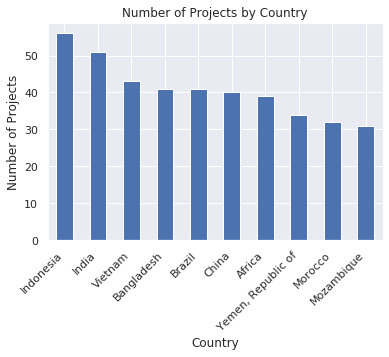

In [278]:
projects_by_country.head(10).plot(kind='bar', rot=45, title='Number of Projects by Country')
plt.xlabel('Country')
plt.ylabel('Number of Projects')
plt.xticks(horizontalalignment='right')
plt.show()

At this point, we can create a dictionary that stores theme codes and names to use in the following two questions.

In [279]:
themecodes_names = normalized_json[['code', 'name']].replace('', np.nan).dropna()
codes_names_dict = themecodes_names.set_index('code').groupby('code')['name'].first().to_dict()
codes_names_dict

{'1': 'Economic management',
 '10': 'Rural development',
 '11': 'Environment and natural resources management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development'}

## 2. Find the top 10 major project themes.

We can create a groupby which collects the frequency of each theme code (since the name has incomplete data). Since the resulting groupby only contains the code and frequency, which is not intuitive, we can use our *codes_names_dict* to create a column of corresponding theme names. The top 10 themes are generated by running the cell below:

In [280]:
freq_of_projects = normalized_json.groupby('code')['name'].count().sort_values(ascending=False).reset_index()
freq_of_projects['names'] = freq_of_projects['code'].map(codes_names_dict)
freq_of_projects = freq_of_projects[['code', 'names', 'name']].set_index('code')
freq_of_projects.columns = ['name', 'frequency']
freq_of_projects.head(10)

,name,frequency
code,,
11,Environment and natural resources management,250
10,Rural development,216
8,Human development,210
2,Public sector governance,199
6,Social protection and risk management,168
4,Financial and private sector development,146
7,Social dev/gender/inclusion,130
5,Trade and integration,77
9,Urban development,50


#### Visualization:

We can plot the number of occurrences of each theme to see that there were more than 16 times as many projects with theme \#11 (Environment and Natural Resources Management) than with theme \#3 (Rule of Law).

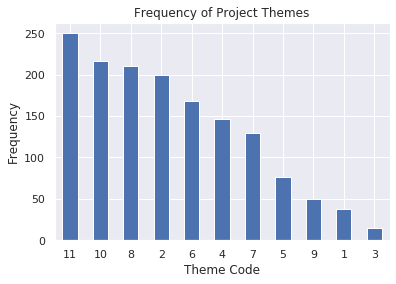

In [281]:
freq_of_projects.plot(y='frequency', kind='bar', rot=0, title='Frequency of Project Themes', legend=False)
plt.xlabel('Theme Code')
plt.ylabel('Frequency')
plt.show()

## 3. Create a dataframe with missing theme names filled in.

Because we have already created a *codes_names_dict*, we can easily loop through each dict in the *'mjtheme_namecode'* column and fill in the correct value.

In [282]:
json_df = pd.DataFrame(json_data)
for line in json_df['mjtheme_namecode']:
    for codename_dict in line:
        codename_dict['name'] = codes_names_dict[codename_dict['code']]

An assert statement can be run to make sure we have filled in all of the missing values.

In [283]:
for line in json_df['mjtheme_namecode']:
    for codename_dict in line:
        assert codename_dict['name'] != ''